# Objective

The hypothesis we aim to test is that Friday is the best day to get maximum tweet engagement. In this milestone, our objective is to calculate the p-values between Friday and other-day tweet engagement rates and interpret the significance of the relationship.

# Instructions

- Write a function that takes two arrays as input arguments and returns a p-value of the permutation test.
    - To calculate the p-value of the permutation test, apply these in a function:
    - Calculate the means of the arrays and assign the absolute difference value of them to the extreme_mean_diff variable.
    - Stack two arrays column-wise into a single array.
    - Shuffle the merged array and split it into two different arrays. Make the sample sizes the same as the initial arrays. - Then calculate the means of these new arrays and their absolute difference value.
    - Repeat the process in the previous step 30,000 times and count how many times the new calculated absolute difference value is greater than our initial extreme_mean_diff value.
    - Return the “total count” / 30,000 as a p-value.
- Assign 0 to a NumPy random seed value.
- Create two new DataFrames: One contains only one column with engagement rates for Friday, and the other contains 6 columns with engagement rates for other days. Use the DataFrame generated in the previous milestone for this task.
- Calculate the p-values between Friday and each other day using the permutation test function we created and store the p-values to a variable.

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sb

np.random.seed(0)

### Create permutation test functions

In [2]:
def abs_diff_mean(arr1, arr2):
    return abs(np.mean(arr1) - np.mean(arr2))

In [3]:
def permutation_test(arr1, arr2, n_permutations=30000):
    extreme_mean_difference = abs_diff_mean(arr1, arr2)

    all_data = np.concatenate((arr1, arr2))

    n_extreme_values = 0
    for _ in range(n_permutations):
        shuffled = np.random.permutation(all_data)
        tmp_arr1 = shuffled[:len(arr1)]
        tmp_arr2 = shuffled[len(arr1):]
        if abs_diff_mean(tmp_arr1, tmp_arr2) >= extreme_mean_difference:
            n_extreme_values += 1

    p_value = n_extreme_values / n_permutations
    return p_value

### Load data

In [4]:
df = pd.read_csv('./engagement_per_week_per_day.csv')
df.head()

,week_number,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,9,0.259494,0.216942,0.144737,0.062857,0.047619,0.071240,0.151786
1,10,0.230909,0.153584,0.143251,0.195335,0.069182,0.203361,0.221649
2,11,0.060475,0.143275,0.041667,0.195777,0.126437,0.335196,0.179825
3,12,0.120275,0.040000,0.042857,0.126095,0.184211,0.325000,0.273810
4,13,0.200573,0.119403,0.181159,0.035714,0.095628,0.252404,0.115385


#### Engagement rate

<AxesSubplot:>

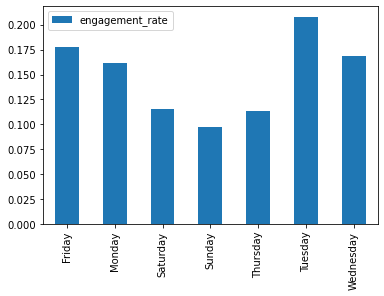

In [5]:
df.drop(columns='week_number').groupby(lambda x: 'engagement_rate').mean().T.plot(kind='bar')

### Calculate p-values

In [6]:
friday = df['Friday']
other_days = df.drop(columns=['week_number', 'Friday'])

In [7]:
other_days.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.216942,0.144737,0.062857,0.047619,0.071240,0.151786
1,0.153584,0.143251,0.195335,0.069182,0.203361,0.221649
2,0.143275,0.041667,0.195777,0.126437,0.335196,0.179825
3,0.040000,0.042857,0.126095,0.184211,0.325000,0.273810
4,0.119403,0.181159,0.035714,0.095628,0.252404,0.115385


In [8]:
p_values = {}
for c in other_days.columns:
    p_values[c] = permutation_test(friday, other_days[c])

In [9]:
p_values

{'Monday': 0.5096,
 'Saturday': 0.0129,
 'Sunday': 0.0026666666666666666,
 'Thursday': 0.009366666666666667,
 'Tuesday': 0.3554333333333333,
 'Wednesday': 0.7225}

<AxesSubplot:>

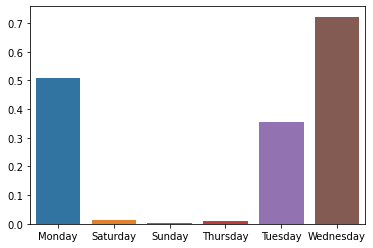

In [10]:
sb.barplot(x=list(p_values.keys()), y=list(p_values.values()))

In [11]:
with open('p_values.json', 'w') as f:
    json.dump(p_values, f)